# Diabetes Detection usin SVM(support vector machine)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#getting dataset from ditrctory csv file
dd=pd.read_csv("diabetes.csv")
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#what is the BMI
'''
BMI= weight (kg)
     -----------
     height (m)2 '''
#what is my BMI-Body Mass Index (BMI)
 
print("MY BMI:",73/1.70688**2)


MY BMI: 25.05629656950924


In [6]:
#what is Diabetes Pedigree Function (DPF)
#The Diabetes Pedigree Function (DPF) is a function used in the Diabetes dataset
'''
DPF= Sum of Diabetes Pedigree Scores from Relatives+0.1
     ---------------------------------------------------
            Number of Relatives with Data+1
In this formula:

The "Sum of Diabetes Pedigree Scores from Relatives" is the sum of the Diabetes Pedigree Scores for all the relatives in the family.
The "+ 0.1" is added to avoid division by zero if there are no relatives with data.
The "Number of Relatives with Data" is the count of relatives for whom diabetes pedigree data is available.

'''


'\nDPF= Sum of Diabetes Pedigree Scores from Relatives+0.1\n     ---------------------------------------------------\n            Number of Relatives with Data+1\nIn this formula:\n\nThe "Sum of Diabetes Pedigree Scores from Relatives" is the sum of the Diabetes Pedigree Scores for all the relatives in the family.\nThe "+ 0.1" is added to avoid division by zero if there are no relatives with data.\nThe "Number of Relatives with Data" is the count of relatives for whom diabetes pedigree data is available.\n\n'

In [8]:
#analyzing the data
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


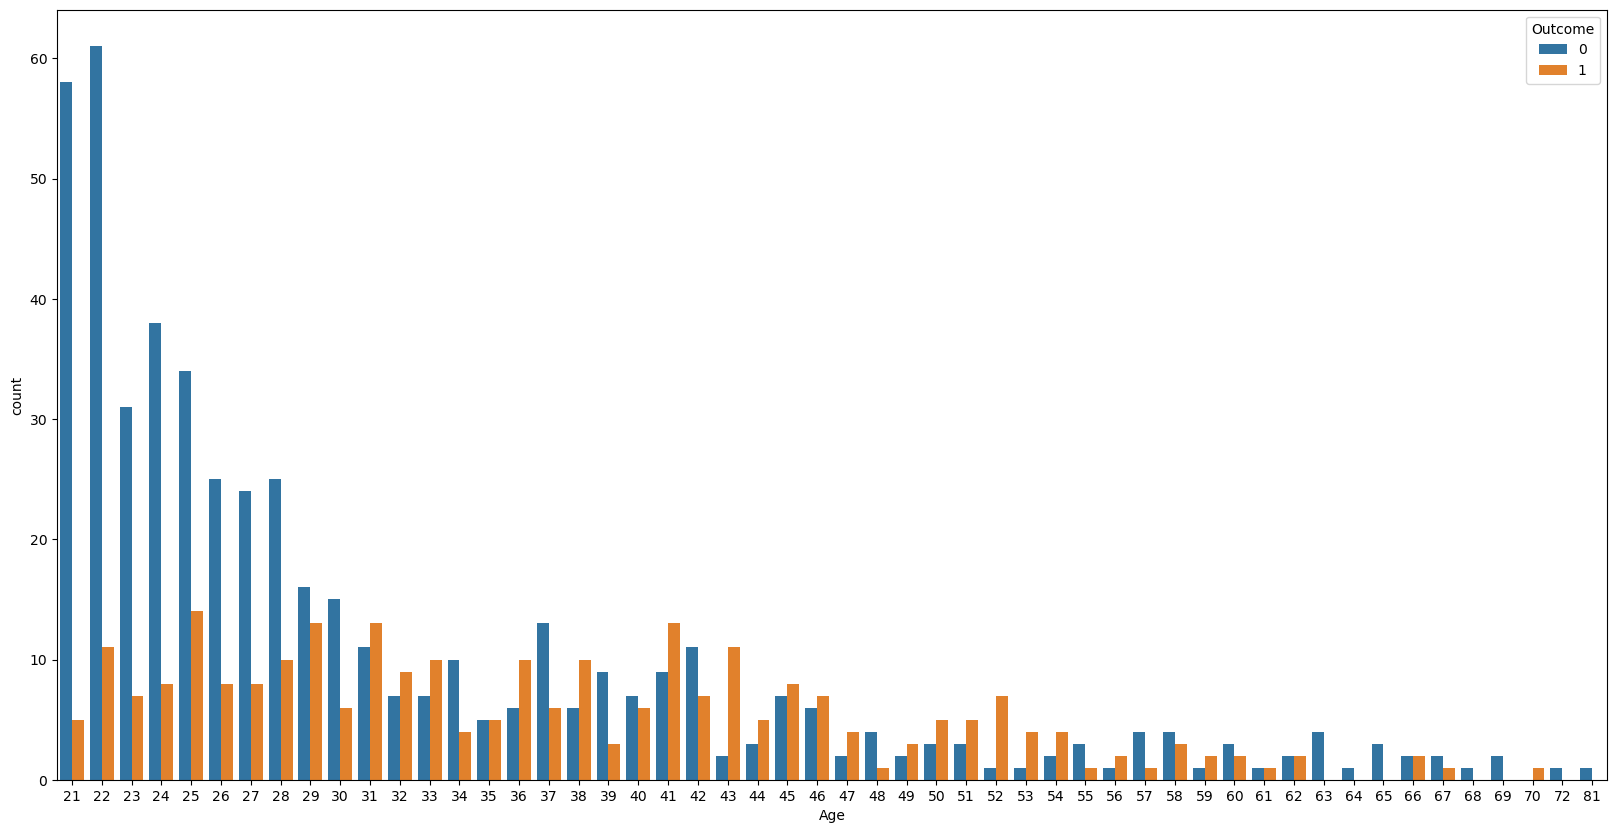

In [28]:
#diabieties patients and non-diabetes patients count using countplot
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Outcome',data=dd)
plt.show()

In [30]:
#finding the only diabeties patients age wise
dd1=dd[dd["Outcome"]==1]
dd1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


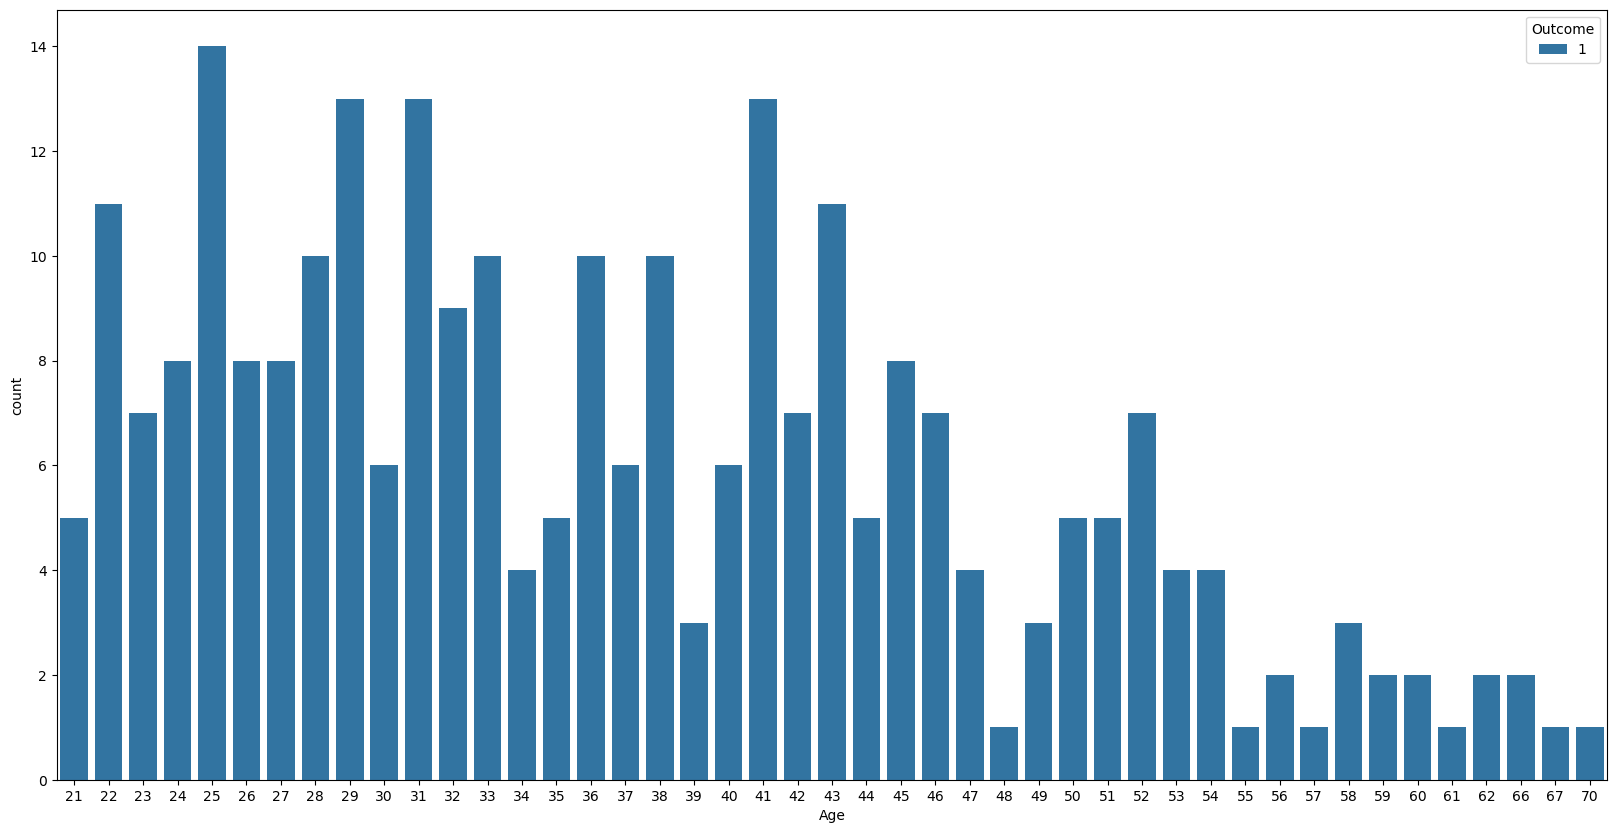

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Outcome',data=dd1)
plt.show()

In [35]:
#finding Average DiabetesPedigreeFunction and BMI values for agewise
dd.groupby('Age')['DiabetesPedigreeFunction','BMI'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10356\552373586.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dd.groupby('Age')['DiabetesPedigreeFunction','BMI'].mean()


,DiabetesPedigreeFunction,BMI
Age,,
21,0.433825,27.817460
22,0.430625,29.509722
23,0.438579,31.502632
24,0.393565,32.569565
25,0.600500,31.943750
26,0.413455,34.915152
27,0.471750,31.950000
28,0.459629,33.642857
29,0.408897,33.541379


In [37]:
#getting column names from the dataset
dd.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
#applying standared scaler
from sklearn.preprocessing import StandardScaler
stan=StandardScaler()
x=stan.fit_transform(dd.iloc[:,:8])
#note=we can improve accuracy by applying standared sclaer

In [74]:
#segeregate the datas as x and y for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,dd['Outcome'],test_size=0.25,random_state=1)

In [75]:
dd.iloc[:,:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [108]:
#applying the SVM algorithm for train datas
from sklearn import svm
sv=svm.SVC(kernel='rbf',probability=True)
sv.fit(x_train,y_train)

SVC(probability=True)

In [109]:
x_test

array([[ 0.93691372,  0.47275805,  0.25303625, ..., -0.76057349,
         0.52889435,  1.51108316],
       [-0.84488505,  0.94221523, -0.47073225, ..., -0.74788157,
        -0.88452119, -0.95646168],
       [ 0.63994726, -0.37226487, -0.47073225, ..., -0.88749274,
        -0.80297799, -0.53102292],
       ...,
       [ 0.3429808 , -0.49745345,  0.14964075, ...,  0.62284628,
        -0.94492356, -0.44593516],
       [ 2.7187125 , -1.40507067, -0.47073225, ...,  0.10247738,
        -0.88150107,  0.66020563],
       [ 0.04601433, -0.84172205, -0.2122435 , ..., -0.92556851,
        -0.97814487, -1.04154944]])

In [110]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
247    0
189    1
139    0
518    0
629    0
Name: Outcome, Length: 192, dtype: int64

In [111]:
#predict the values by x_test values
y_prd=sv.predict(x_test)

In [112]:
y_prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [145]:
#total predicted 0 values
(y_prd==0).sum()

140

In [146]:
#total predicted 1 values
(y_prd==1).sum()

52

In [149]:
#total tested 0 values
(y_test==0).sum()

123

In [147]:
#total tested 1 values
(y_test==1).sum()

69

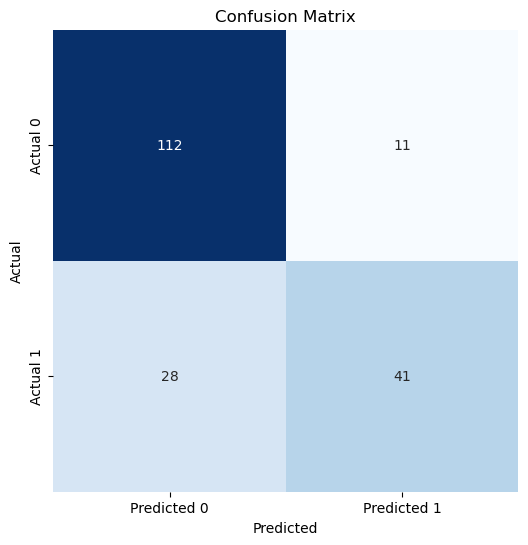

In [155]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_prd)
plt.figure(figsize=(6, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#fmt='d': This parameter specifies the format of the annotations. In this case, 'd' indicates that the values should be formatted as integers.

In [113]:
#checking the accuracy
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_prd)
print("Accuracy is:",acc*100)

Accuracy is: 79.6875


# accuracy is good so now move on to some user tetsing

In [114]:
dd.iloc[258]

Pregnancies                   1.000
Glucose                     193.000
BloodPressure                50.000
SkinThickness                16.000
Insulin                     375.000
BMI                          25.900
DiabetesPedigreeFunction      0.655
Age                          24.000
Outcome                       0.000
Name: 258, dtype: float64

In [115]:
#applying the the dataset 258 row values into model to predict outcome
pre=sv.predict([dd.iloc[258,:8]])

In [116]:
pre

array([0], dtype=int64)

# we hav tried to predict dataset one row and we got predict value and that outcome values are smae.now move on for real time users

In [117]:
#getting input from user 
pregnancies=float(input("Enter the Pregnancies:"))
glucose=float(input("Enter the Glucose:"))
bloodpressure=float(input("Enter the BloodPressure:"))
skinthickness=float(input("Enter the skinthickness:"))
insulin=float(input("Enter the Insulin:"))
bmi=float(input("Enter the BMI:"))
dpf=float(input("Enter the DBF:"))
age=float(input("Enter the AGE:"))
input_array=np.array([[pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,dpf,age]])
input_array

Enter the Pregnancies:1
Enter the Glucose:85
Enter the BloodPressure:66
Enter the skinthickness:29
Enter the Insulin:0
Enter the BMI:26
Enter the DBF:0
Enter the AGE:31


array([[ 1., 85., 66., 29.,  0., 26.,  0., 31.]])

In [118]:
#predict the user has diabetes or not based on user input
user_predict=sv.predict(input_array)
if user_predict==1:
    print("HE HAS DIABETES")
else:
    print("HE NOT HAS DIABITES")

HE NOT HAS DIABITES


In [104]:
dd.iloc[1]

Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64

In [120]:
#checking the probability of user get diabeties
propability=sv.predict_proba(input_array)
propability

array([[0.4937618, 0.5062382]])

In [133]:
print(f"He has {round(propability[0][0]*100)}% probability to get diabetes")

He has 49% probability to get diabetes
